In [17]:
# Import custom functions and necessary libraries.
from readExcelData import readExcelData
from add_Dates import add_Dates, mod
from bootstrap import bootstrap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from zeroRates import zeroRates

# Read data from an Excel file using the custom function.
# The function returns two objects: one containing date information and one containing rate data.
[datesSet, ratesSet] = readExcelData()

# Print the retrieved dates and rates to the console.
print("Settlement Date:", datesSet.settle)
print("Depo Dates:\n", datesSet.depos)
print("Future Dates:\n", datesSet.future)
print("Swap Dates:\n", datesSet.swap)

import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format)

print("Depo Rates:\n", ratesSet.depos)
print("Future Rates:\n", ratesSet.future)
print("Swap Rates:\n", ratesSet.swap)

File found and loaded successfully!
Settlement Date: 2023-02-02 00:00:00
Depo Dates:
            Settle Dates
9   2023-02-03 00:00:00
10  2023-02-09 00:00:00
11  2023-03-02 00:00:00
12  2023-04-03 00:00:00
13  2023-05-02 00:00:00
14  2023-08-02 00:00:00
Future Dates:
                  Settle               Expiry
10  2023-03-15 00:00:00  2023-06-15 00:00:00
11  2023-06-21 00:00:00  2023-09-21 00:00:00
12  2023-09-20 00:00:00  2023-12-20 00:00:00
13  2023-12-20 00:00:00  2024-03-20 00:00:00
14  2024-03-20 00:00:00  2024-06-20 00:00:00
15  2024-06-19 00:00:00  2024-09-19 00:00:00
16  2024-09-18 00:00:00  2024-12-18 00:00:00
17  2024-12-18 00:00:00  2025-03-18 00:00:00
18  2025-03-19 00:00:00  2025-06-19 00:00:00
Swap Dates:
              Swap Dates
37  2025-02-03 00:00:00
38  2026-02-02 00:00:00
39  2027-02-02 00:00:00
40  2028-02-02 00:00:00
41  2029-02-02 00:00:00
42  2030-02-04 00:00:00
43  2031-02-03 00:00:00
44  2032-02-02 00:00:00
45  2033-02-02 00:00:00
46  2034-02-02 00:00:00
47  

Aggregated (sorted) dates:
          Date
0   2023-02-02
1   2023-02-03
2   2023-02-09
3   2023-03-02
4   2023-04-03
..         ...
56  2069-02-04
57  2070-02-03
58  2071-02-02
59  2072-02-02
60  2073-02-02

[61 rows x 1 columns]
Aggregated (sorted) discounts:
    Discount Factor
0    1.000000000000
1    0.999947113908
2    0.999631663500
3    0.998309639933
4    0.995830788432
..              ...
56   0.412745373506
57   0.408749790641
58   0.404991721995
59   0.401478410591
60   0.398252244912

[61 rows x 1 columns]


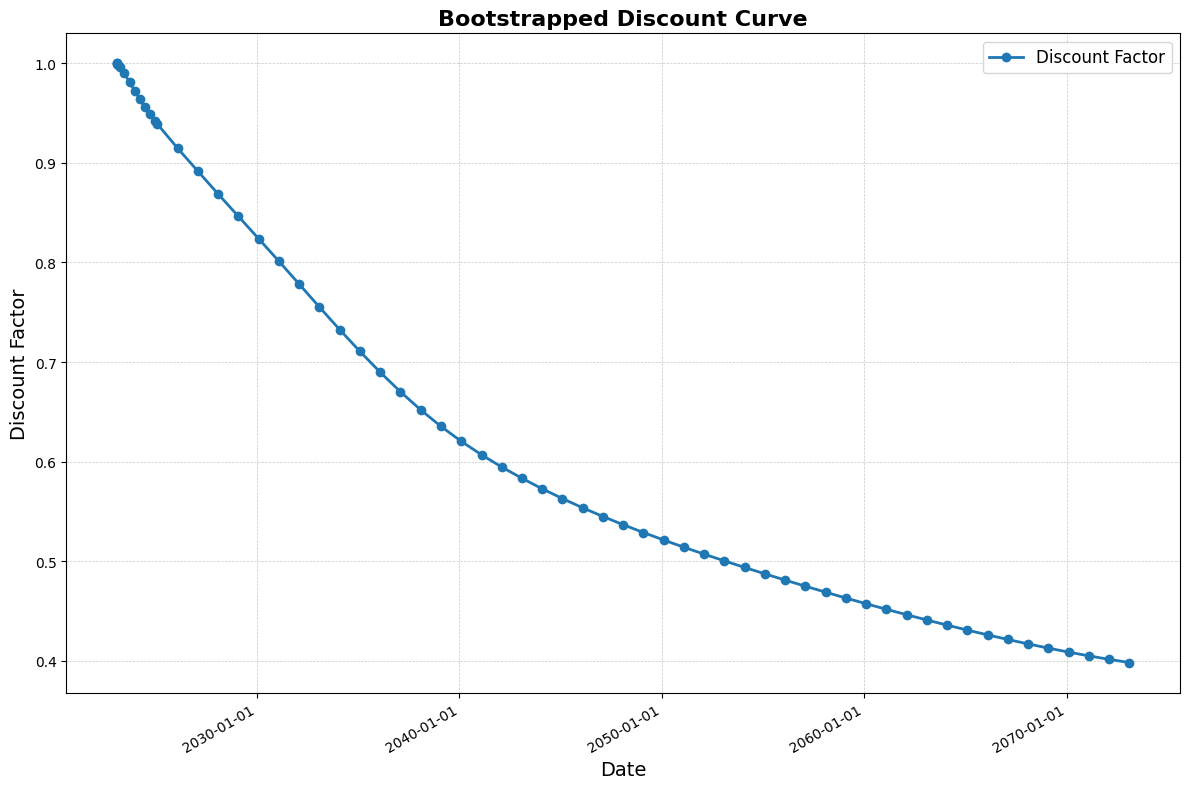

In [ ]:

# Generate annual dates using the settlement date.
# 'years' specifies the number of years (50 in this case) and mod.Modified is a mode parameter.
years = 50
df = add_Dates(datesSet.settle, years, mod.Modified)

# Calculate discount factors using the bootstrap method.
dates, discounts = bootstrap(datesSet, ratesSet)

# Print the aggregated and sorted dates.
print("Aggregated (sorted) dates:")
print(dates)

# Set the display format for floating-point numbers to 12 decimal places and print the discount factors.
print("Aggregated (sorted) discounts:")
pd.set_option('display.float_format', '{:.12f}'.format)
print(discounts)

# First Plot: Bootstrapped Discount Curve
plt.figure(figsize=(12, 8))  # Create a figure of size 12x8 inches.
plt.plot(dates, discounts, marker='o', markersize=6, linestyle='-', linewidth=2, label='Discount Factor')
plt.xlabel('Date', fontsize=14)  # Set the x-axis label.
plt.ylabel('Discount Factor', fontsize=14)  # Set the y-axis label.
plt.title('Bootstrapped Discount Curve', fontsize=16, fontweight='bold')  # Set the plot title.
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Enable grid lines.
plt.legend(fontsize=12)  # Display the legend.
plt.gcf().autofmt_xdate()  # Auto-format the x-axis dates for better appearance.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Define the date format.
plt.tight_layout()  # Adjust subplots to fit the figure area.
plt.show()  # Display the discount curve plot.

c:\Users\crive\Desktop\POLI\Magistrale\ANNO_1__magistrale\FINANCIAL ENGINEERING\Assignment_RM0\zeroRates.py:59: RuntimeWarning: invalid value encountered in divide
  z_rates = (-np.log(discount_list) / y_frac) * 100


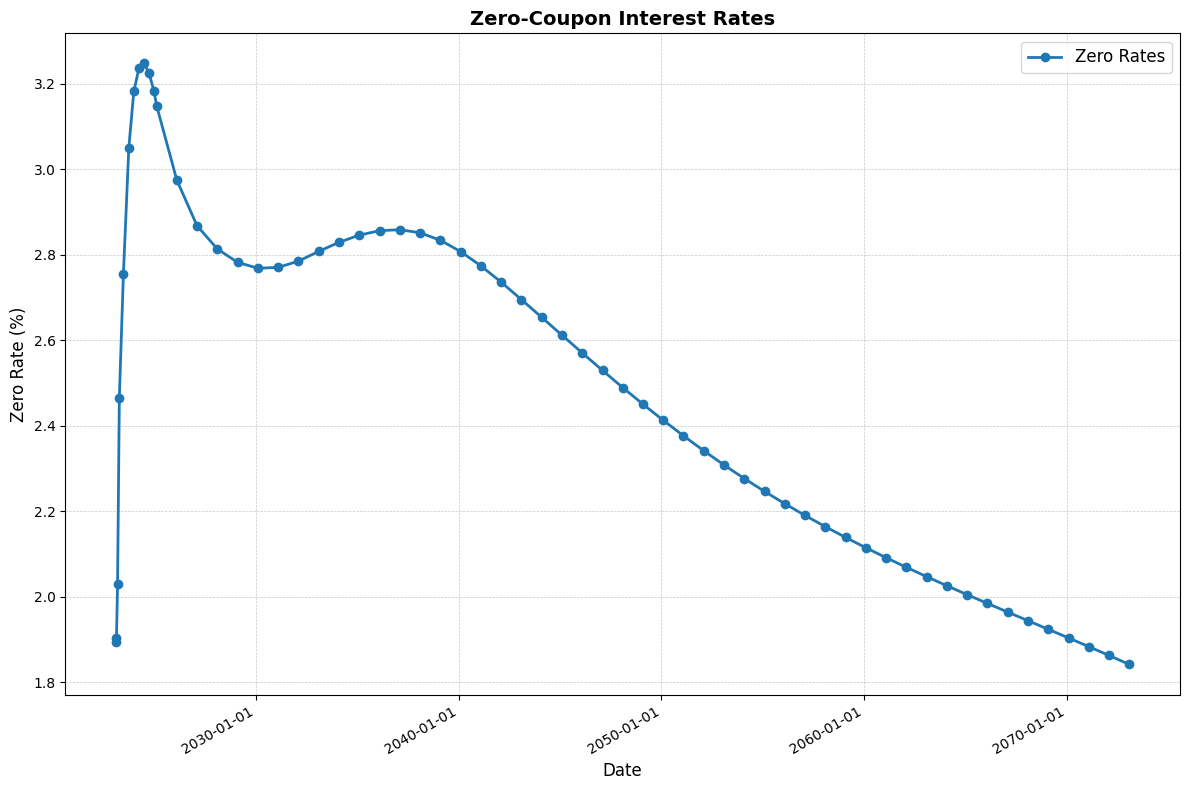

In [ ]:
# Calculate the zero-coupon interest rates based on the discount factors.
df_zero = zeroRates(dates, discounts)

# Second Plot: Zero-Coupon Interest Rates
plt.figure(figsize=(12, 8))  # Create a new figure with the specified size.
# Exclude the first element of the 'dates' DataFrame (assumes the first date is not needed).
plot_dates = dates["Date"].iloc[1:].reset_index(drop=True)
# Convert the 'Zero Rate' column to float (assuming df_zero has already removed the first element).
plot_zero = df_zero["Zero Rate"].astype(float)
plt.plot(plot_dates, plot_zero, marker='o', linestyle='-', linewidth=2, markersize=6, label='Zero Rates')
plt.xlabel('Date', fontsize=12)  # Set the x-axis label.
plt.ylabel('Zero Rate (%)', fontsize=12)  # Set the y-axis label.
plt.title('Zero-Coupon Interest Rates', fontsize=14, fontweight='bold')  # Set the plot title.
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Enable grid lines.
plt.legend(fontsize=12)  # Display the legend.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Define the date format for the x-axis.
plt.gcf().autofmt_xdate()  # Auto-format the x-axis dates.
plt.tight_layout()  # Adjust the layout.
plt.show()  # Display the zero-coupon rates plot.